<a href="https://colab.research.google.com/github/ArdenDiago/MyMLModels/blob/main/mnist_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all the module
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
# Getting the Data

MNIST_data = fetch_openml("mnist_784", as_frame=False)

In [3]:
X, y = MNIST_data.data, MNIST_data.target

In [4]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
# viewing the first data
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
X[0].shape, X

((784,),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [8]:
X[0].reshape(28,28).shape, X[0].reshape(28, 28)

((28, 28),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
 

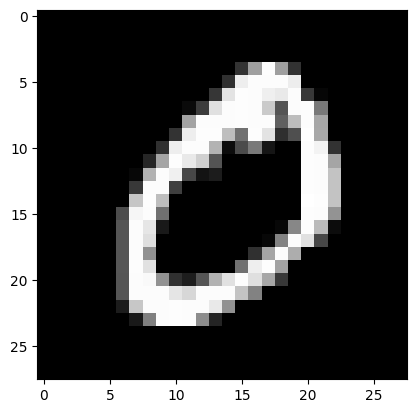

In [9]:
# building the image function

def display_number(index):
  "Display a Single image"
  plt.imshow(X[index].reshape(28,28), cmap="gray")
  plt.show()

display_number(1)

In [10]:
# lets check the size of the Dataset
len(X)

70000

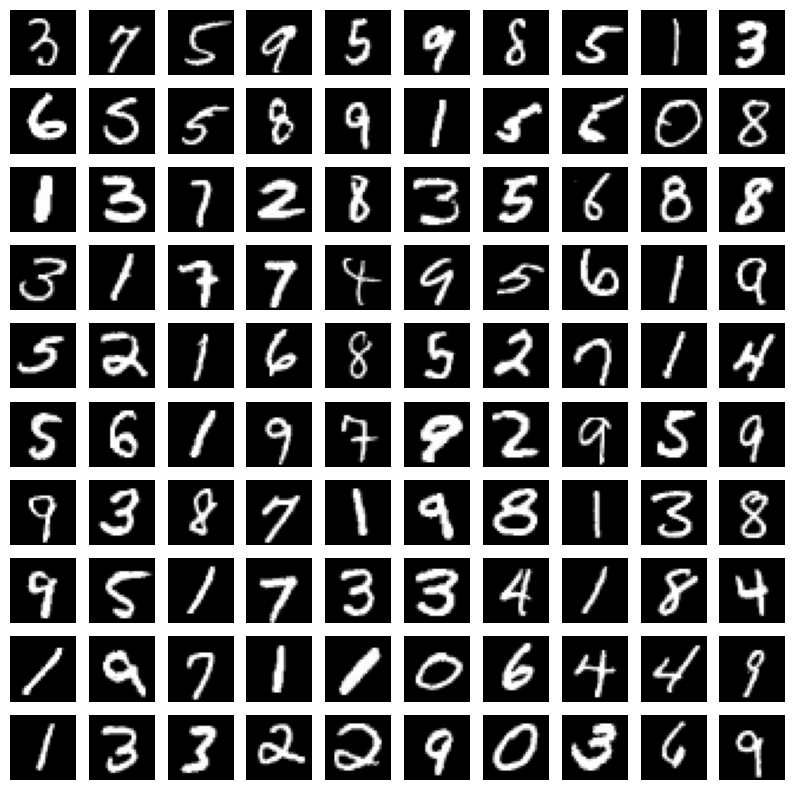

In [11]:
# let's check randome images in the dataset
import random

def display_random_images(n=100):
  "Display n numbers of random images"
  plt.figure(figsize=(10,10))
  for i in range(n):
    ax = plt.subplot(int(n / 10),  int(n /10), i + 1)
    random_index = random.randint(0, len(X))
    plt.imshow(X[random_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
  plt.show()

display_random_images()

# normilize the data

the data in from 0 to 255. lets make it in the range of 0 to 1

In [12]:
X = X/255

In [33]:
# Convert X and y to float32
X = X.astype(np.float32)
y = y.astype(np.float32)

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
X_train.shape

(56000, 784)

In [36]:
X_train[0].dtype

dtype('float32')

In [40]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(28, 28)), -> not required as i already flattened it
    tf.keras.layers.Dense(20, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

hist_1 = model_1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7645 - loss: 0.7591 - val_accuracy: 0.9254 - val_loss: 0.2528
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9365 - loss: 0.2164 - val_accuracy: 0.9366 - val_loss: 0.2107
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9497 - loss: 0.1687 - val_accuracy: 0.9432 - val_loss: 0.1918
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9557 - loss: 0.1444 - val_accuracy: 0.9458 - val_loss: 0.1852
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9606 - loss: 0.1296 - val_accuracy: 0.9490 - val_loss: 0.1788


In [41]:
# checking the model how correct it is
model_1.evaluate(X_test, y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9487 - loss: 0.1769


[0.17879779636859894, 0.9490000009536743]

<Axes: >

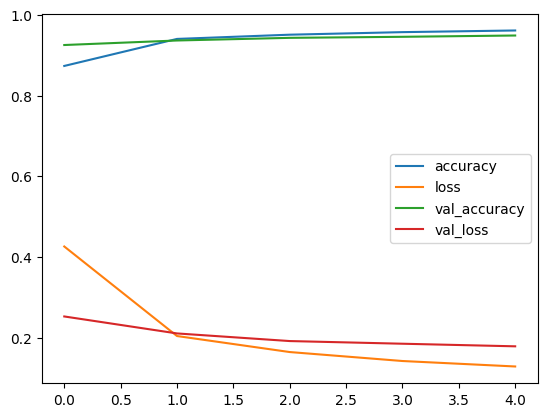

In [42]:
pd.DataFrame(hist_1.history).plot()

In [49]:
# testing with different Learning rates

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


hist_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7967 - loss: 0.6657 - val_accuracy: 0.9328 - val_loss: 0.2208
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9455 - loss: 0.1806 - val_accuracy: 0.9479 - val_loss: 0.1740
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9581 - loss: 0.1364 - val_accuracy: 0.9542 - val_loss: 0.1565
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9647 - loss: 0.1139 - val_accuracy: 0.9573 - val_loss: 0.1514
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9701 - loss: 0.0976 - val_accuracy: 0.9578 - val_loss: 0.1495
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9736 - loss: 0.0858 - val_accuracy: 0.9558 - val_loss: 0.1588
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9769 - loss: 0.0749 - val_accuracy: 0.9558 - val_loss: 0.1610
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9785 - loss: 0.0665 - val_accurac

<Axes: >

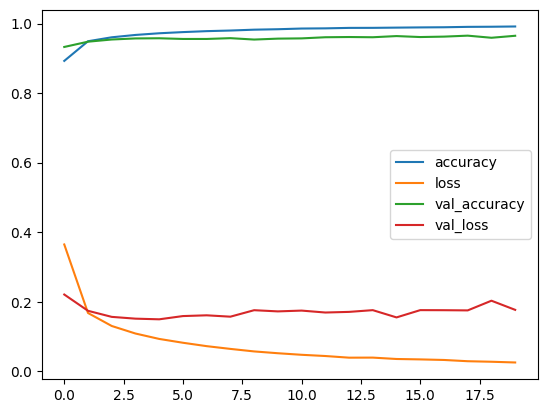

In [50]:
pd.DataFrame(hist_2.history).plot()

In [52]:
model_2.evaluate(X_test, y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9649 - loss: 0.1656


[0.1767152100801468, 0.9649285674095154]

# Making a confussin matrix

In [53]:
from sklearn.metrics import confusion_matrix

y_pred = model_2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1310,    0,    7,    0,    0,    3,   15,    2,    2,    4],
       [   0, 1588,    1,    1,    1,    0,    1,    2,    3,    3],
       [   2,   21, 1320,   11,    4,    2,    4,    5,    7,    4],
       [   0,    4,   15, 1367,    2,   22,    1,    7,    5,   10],
       [   0,    3,    4,    0, 1231,    2,   10,    2,    4,   39],
       [   1,    3,    0,   19,    1, 1222,   20,    0,    5,    2],
       [   1,    0,    1,    0,    3,    6, 1382,    0,    2,    1],
       [   1,   12,   20,    5,    3,    1,    0, 1442,    6,   13],
       [   2,   14,    9,   13,    4,   17,   10,    1, 1274,   13],
       [   8,    4,    1,    8,   13,    7,    0,   13,    8, 1358]])

In [62]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_CM(y_true, y_pred, classes=None, figsize=(10,10), text_size=15, norm=False, savefig=False):
  # create a confusion matrix

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # create a matrix plot

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="confussion matrix", xlabel="predicted Lable", ylabel="True Label", xticks=np.arange(n_classes), yticks=np.arange(n_classes), xticklabels=labels, yticklabels=labels)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size=(text_size)
  ax.xaxis.label.set_size=(text_size)
  ax.title.set_size=(text_size)

  threshold = (cm.max() + cm.min())

  for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i, j] > threshold else "black",size=text_size)

In [64]:
y_preds = model_2.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


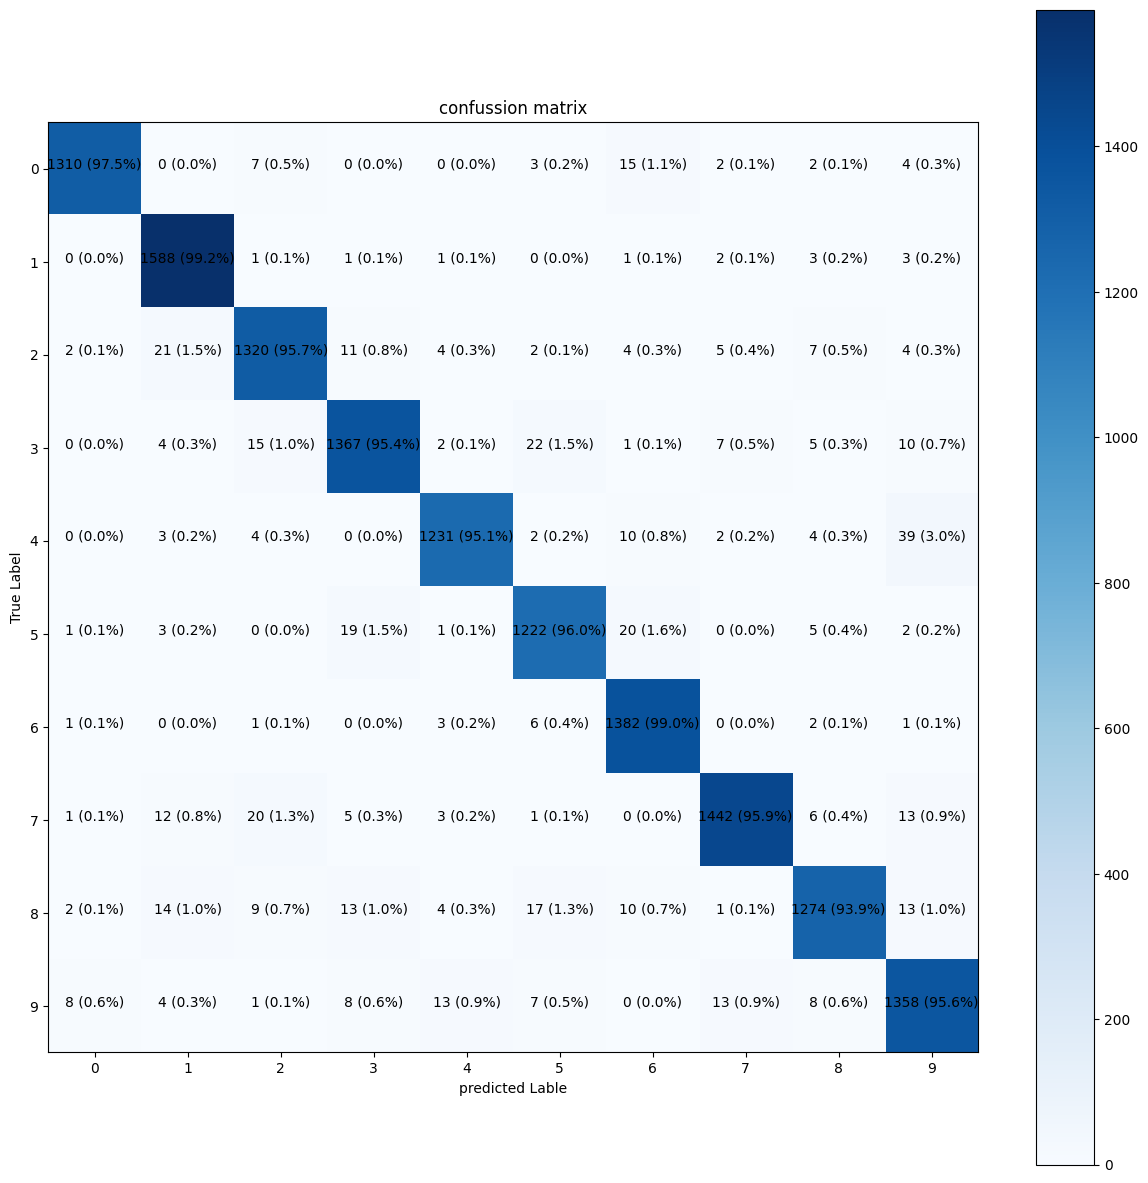

In [65]:
make_CM(y_true=y_test, y_pred=y_preds, classes=[0,1,2,3,4,5,6,7,8,9], figsize=(15,15), text_size=10)

In [66]:
model_2.save("model_2.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


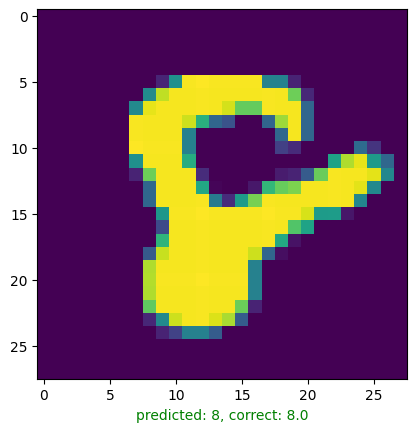

In [78]:
# def model prediction

def model_correctness(model):
  random_number = random.randint(0, len(X_test))
  target_value = X_test[random_number].reshape(1, 784)
  result = model.predict(target_value)
  result_label = result.argmax()
  correct_label = y_test[random_number]

  if result_label == correct_label:
    color='green'
  else:
    color='red'

  plt.imshow(target_value.reshape(28, 28))
  plt.xlabel(f"predicted: {result_label}, correct: {correct_label}", color=color)
  plt.show()

model_correctness(model_2)